# **Twitter Sentiment Analysis Using Transformer model** ![twitter](images/twitter_logo.png)

![ST4](https://media.giphy.com/media/l41Y9SKrl3kLVamfC/giphy.gif)

For this project, we will be performing data analysis on tweets about the netflix series "stranger things" as Season 4 just released on Netflix weeks days ago.
- Date of 1st half release: 2022-05-27
- Date of complete series release: 1st of July 2022
- Date of Project creation: 7th of july 2022
- Scraped Data: Most recent 50000 tweets from on Date of complete series release to Date of 1st half release

## **STAGE 1:** WebScraping using snscrape

### We start by importing the necessary libraries

In [1]:
# Import necessary libraries
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm
import plotly.express as px
import matplotlib.pyplot as plt

### Now we begin Scraping!!!

In [2]:
# scraping the data
query = "stranger things until:2022-07-02 since:2022-05-27"
limit = 100000
tweets = []
for tweet in tqdm(sntwitter.TwitterSearchScraper(query).get_items(), total = limit):
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.user.username, tweet.content, tweet.lang])

100%|██████████| 100000/100000 [2:34:07<00:00, 10.81it/s] 


![hh](https://media.giphy.com/media/kYM7OxSxn1Tgkq8f4o/giphy.gif)

### Converting Scraped data to pandas DataFrame

In [3]:
# Converting list of data to DataFrame
df = pd.DataFrame(tweets, columns = ['Date', 'User', 'Tweet', 'Language'])
df

Date            User  \
0     2022-07-01 23:59:59+00:00       sshuasite   
1     2022-07-01 23:59:59+00:00       UrFav3laa   
2     2022-07-01 23:59:59+00:00       LukeRoy26   
3     2022-07-01 23:59:59+00:00   Morgane_Stark   
4     2022-07-01 23:59:59+00:00       Verlaxify   
...                         ...             ...   
99995 2022-07-01 20:08:47+00:00  elaineskennedy   
99996 2022-07-01 20:08:47+00:00       ialissonn   
99997 2022-07-01 20:08:47+00:00       vangogtae   
99998 2022-07-01 20:08:47+00:00       DarthZiel   
99999 2022-07-01 20:08:47+00:00     hihowareyoa   

                                                   Tweet Language  
0           no quiero ver stranger things m da miedo nia       es  
1      يربي اي العظمة دي بجد اخر حلقة نزلت من strange...       ar  
2      *SPOILERS*\n#StrangerThings was awesome first ...       en  
3                             J’ai fini Stranger Things.       fr  
4      STRANGER THINGS IS AMAZING!!! #StrangerThings4...       en  
...                                                  ...      ...  
99995     last episode of stranger things. not prepared.       en  
99996  terminei stranger things e EU NÃO TÔ BEM… netf...       pt  
99997  @vinizadaxx tava bem até assistir o final de s...       pt  
99998  With how things ended on sesson three, I wasn'...       en  
99999  japierdole kurwamac #StrangerThings https://t....       pl  

[100000 rows x 4 columns]

### Storing and reloading data

In [4]:
df.to_csv('strangerThing.csv', index=False)

In [5]:
df = pd.read_csv('strangerThing.csv')
df

Date            User  \
0      2022-07-01 23:59:59+00:00       sshuasite   
1      2022-07-01 23:59:59+00:00       UrFav3laa   
2      2022-07-01 23:59:59+00:00       LukeRoy26   
3      2022-07-01 23:59:59+00:00   Morgane_Stark   
4      2022-07-01 23:59:59+00:00       Verlaxify   
...                          ...             ...   
99995  2022-07-01 20:08:47+00:00  elaineskennedy   
99996  2022-07-01 20:08:47+00:00       ialissonn   
99997  2022-07-01 20:08:47+00:00       vangogtae   
99998  2022-07-01 20:08:47+00:00       DarthZiel   
99999  2022-07-01 20:08:47+00:00     hihowareyoa   

                                                   Tweet Language  
0           no quiero ver stranger things m da miedo nia       es  
1      يربي اي العظمة دي بجد اخر حلقة نزلت من strange...       ar  
2      *SPOILERS*\n#StrangerThings was awesome first ...       en  
3                             J’ai fini Stranger Things.       fr  
4      STRANGER THINGS IS AMAZING!!! #StrangerThings4...       en  
...                                                  ...      ...  
99995     last episode of stranger things. not prepared.       en  
99996  terminei stranger things e EU NÃO TÔ BEM… netf...       pt  
99997  @vinizadaxx tava bem até assistir o final de s...       pt  
99998  With how things ended on sesson three, I wasn'...       en  
99999  japierdole kurwamac #StrangerThings https://t....       pl  

[100000 rows x 4 columns]

## **STAGE 2:** Performing Sentiment Analysis

![mm](https://c.tenor.com/yGqQN5P7O80AAAAC/see-you-on-the-other-side-steve-harrington.gif)

### Importing some more libraries

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

### Processing tweets(text) to best fit model

In [ ]:
# Tweets Preprocessing
def tweet_process(df):
    tweet_words = []
    tweet_sent = []
    for tweet in df:
        for word in tweet.split(' '):
            if word.startswith('@') and len(word) > 1:
                word = '@user'
            elif word.startswith('http'):
                word = 'http'
            tweet_words.append(word)
        tweet_proc = " ".join(tweet_words)
        tweet_sent.append(tweet_proc)
        tweet_words = []
    dff = pd.DataFrame({'processed_tweet' : tweet_sent})
    return dff

In [ ]:
df_tweet = tweet_process(df['Tweet'])
df_tweet

### Loading the Roberta Model

In [9]:
# Loading model and tokenizer
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
tokenizer = AutoTokenizer.from_pretrained(MODEL)

In [10]:
# Run Reoberta model
def roberta(tweet):
    encoded_text = tokenizer(tweet, return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'Negative' : scores[0],
        'Neutral' : scores[1],
        'Positive' : scores[2]
    }
    key = [k for k, v in scores_dict.items() if v == max(scores_dict.values())]
    key_dict = {
        'Sentiment': key[0]
    }
    scores_dict.update(key_dict)
    return scores_dict

In [11]:
results = {}
for id, row in tqdm(df_tweet.iterrows(), total=len(df_tweet)):
    text = row['processed_tweet']
    result = roberta(text)
    results[id] = result

100%|██████████| 100000/100000 [2:55:12<00:00,  9.51it/s]  


In [12]:
# Converting results to DataFrame
result_df = pd.DataFrame(results).T
result_df

Negative   Neutral  Positive Sentiment
0      0.133027  0.811901  0.055072   Neutral
1      0.218204  0.744088  0.037708   Neutral
2      0.350062  0.382242  0.267697   Neutral
3      0.076282  0.841153  0.082565   Neutral
4      0.001697  0.016374  0.981929  Positive
...         ...       ...       ...       ...
99995  0.734962  0.235791  0.029247  Negative
99996  0.776556  0.184498  0.038946  Negative
99997  0.067799  0.887601    0.0446   Neutral
99998  0.033607  0.188004  0.778389  Positive
99999  0.101762   0.84133  0.056907   Neutral

[100000 rows x 4 columns]

In [13]:
final_df = pd.concat([df, result_df], axis = 1)
final_df

Date            User  \
0      2022-07-01 23:59:59+00:00       sshuasite   
1      2022-07-01 23:59:59+00:00       UrFav3laa   
2      2022-07-01 23:59:59+00:00       LukeRoy26   
3      2022-07-01 23:59:59+00:00   Morgane_Stark   
4      2022-07-01 23:59:59+00:00       Verlaxify   
...                          ...             ...   
99995  2022-07-01 20:08:47+00:00  elaineskennedy   
99996  2022-07-01 20:08:47+00:00       ialissonn   
99997  2022-07-01 20:08:47+00:00       vangogtae   
99998  2022-07-01 20:08:47+00:00       DarthZiel   
99999  2022-07-01 20:08:47+00:00     hihowareyoa   

                                                   Tweet Language  Negative  \
0           no quiero ver stranger things m da miedo nia       es  0.133027   
1      يربي اي العظمة دي بجد اخر حلقة نزلت من strange...       ar  0.218204   
2      *SPOILERS*\n#StrangerThings was awesome first ...       en  0.350062   
3                             J’ai fini Stranger Things.       fr  0.076282   
4      STRANGER THINGS IS AMAZING!!! #StrangerThings4...       en  0.001697   
...                                                  ...      ...       ...   
99995     last episode of stranger things. not prepared.       en  0.734962   
99996  terminei stranger things e EU NÃO TÔ BEM… netf...       pt  0.776556   
99997  @vinizadaxx tava bem até assistir o final de s...       pt  0.067799   
99998  With how things ended on sesson three, I wasn'...       en  0.033607   
99999  japierdole kurwamac #StrangerThings https://t....       pl  0.101762   

        Neutral  Positive Sentiment  
0      0.811901  0.055072   Neutral  
1      0.744088  0.037708   Neutral  
2      0.382242  0.267697   Neutral  
3      0.841153  0.082565   Neutral  
4      0.016374  0.981929  Positive  
...         ...       ...       ...  
99995  0.235791  0.029247  Negative  
99996  0.184498  0.038946  Negative  
99997  0.887601    0.0446   Neutral  
99998  0.188004  0.778389  Positive  
99999   0.84133  0.056907   Neutral  

[100000 rows x 8 columns]

In [14]:
final_df.to_csv('final_df.csv', index=False)

## **EDA and Visualization**

![vv](https://media.giphy.com/media/7wfWIcQyj2F68vmd18/giphy.gif)

## **NOTE:** The time range of the tweets in the dataset is;
- start: 2022-07-01 20:08:47, approximately = **8:08pm, 1st of July 2022**
- end: 2022-07-01 23:59:59, approximately = **11:59pm, 1st of July 2022**

In [46]:
final_df = pd.read_csv('data/final_df.csv')

### Top 10 Languages

In [47]:
lang_df = final_df.groupby('Language').count()

# Renaming index
lang_df.rename(index={'am': 'Amharic',
'ar': 'Arabic', 'bg': 'Bulgarian', 'ca': 'Catalan', 'cs': 'Czech', 'cy': 'Welsh', 'da': 'Danish', 'de': 'German', 'el': 'Greek',
'en': 'English', 'es': 'Spanish', 'et': 'Estonian', 'eu': 'Basque', 'fa': 'Persian', 'fi': 'Finnish', 'fr': 'French', 'gu': 'Gujarati',
'hi': 'Hindi', 'ht': 'Haitian', 'hu': 'Hungarian', 'in': 'Indonesian', 'is': 'Icelandic', 'it': 'Italian', 'iw': 'Hebrew',
'ja': 'Japanese', 'ko': 'Korean', 'lo': 'Lao', 'lt': 'Lithuanian', 'lv': 'Latvian', 'nl': 'Dutch', 'no': 'Norwegian', 'pl': 'Polish',
'pt': 'Portuguese', 'qam': 'qam', 'qht': 'qht', 'qme': 'qme', 'ro': 'Romanian', 'ru': 'Russian', 'sl': 'Slovenian', 'sr': 'Serbian',
'sv': 'Swedish', 'th': 'Thai', 'tl': 'Tagalog', 'tr': 'Turkish', 'uk': 'Ukrainian', 'und': 'Undetermined', 'ur': 'Urdu', 'vi': 'Vietnamese',
'zh': 'Chinese'}, inplace = True)

# Dropping unwanted index
lang_df = lang_df.drop(['Undetermined', 'qme', 'qam'])

# Arranging dataframe in descending order
lang_df = lang_df.sort_values('Sentiment', ascending = False).head(10)
lang_df

Date   User  Tweet  Negative  Neutral  Positive  Sentiment
Language                                                               
English     52723  52723  52723     52723    52723     52723      52723
Portuguese  24085  24085  24085     24085    24085     24085      24085
Spanish     12258  12258  12258     12258    12258     12258      12258
French       3079   3079   3079      3079     3079      3079       3079
Italian      2280   2280   2280      2280     2280      2280       2280
Polish        769    769    769       769      769       769        769
Turkish       542    542    542       542      542       542        542
German        488    488    488       488      488       488        488
Indonesian    359    359    359       359      359       359        359
Tagalog       291    291    291       291      291       291        291

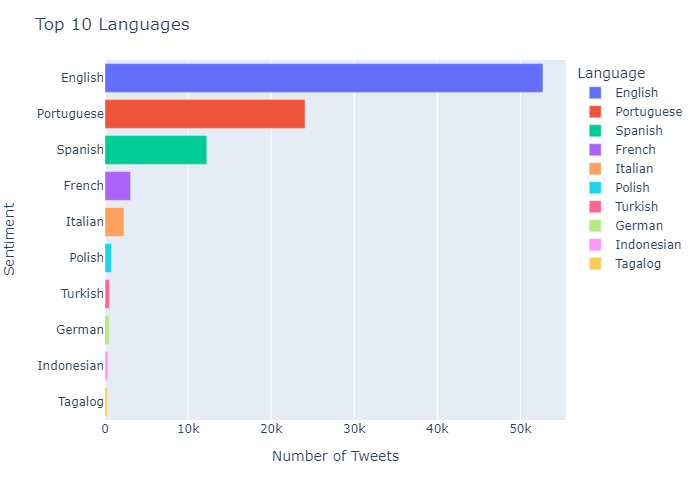

In [48]:
fig = px.bar(lang_df,
             x = 'Sentiment',
             y = lang_df.index,
             color = lang_df.index,
             template = 'plotly',
             height = 500,
            width = 700
            )

fig.update_layout(
    title = 'Top 10 Languages',
    xaxis_title = 'Number of Tweets',
    yaxis_title = 'Sentiment'
)
   
# fig.show()
fig.show(renderer='png')

**Insights:** Between 8:08pm, 1st of July 2022 to 11:59pm, 1st of July 2022, \
English, Portuguese, Spanish, French and Italy are the top 5 languages.

### Bar Chart

In [35]:
sentiment = final_df['Sentiment'].value_counts()
sentiment

Neutral     62629
Negative    22680
Positive    14691
Name: Sentiment, dtype: int64

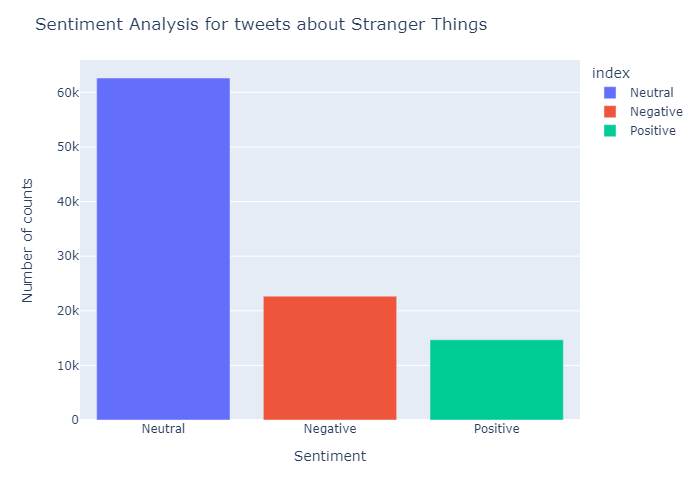

In [36]:
fig = px.bar(sentiment,
             y='Sentiment',
             x=sentiment.index,
             color=sentiment.index,
             template = 'plotly',
             height = 500,
            width = 700
            )

fig.update_layout(
    title = 'Sentiment Analysis for tweets about Stranger Things',
    yaxis_title = 'Number of counts',
    xaxis_title = 'Sentiment'
)
   
# fig.show()
fig.show(renderer='png')

### Pie Chart

In [37]:
compare_df = final_df[final_df['Sentiment'] != 'Neutral'].reset_index(drop=True)
pie_df = compare_df['Sentiment'].value_counts()
pie_df

Negative    22680
Positive    14691
Name: Sentiment, dtype: int64

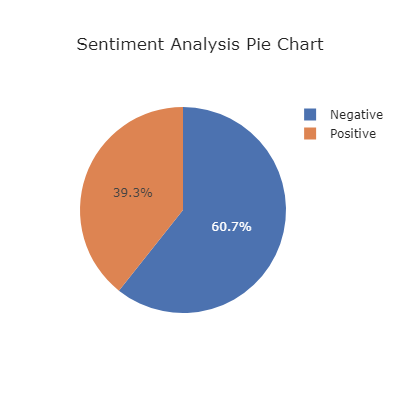

In [38]:
fig = px.pie(pie_df,
             values = pie_df,
             title = 'Sentiment Analysis Pie Chart',
             names = pie_df.index,
             height = 400,
             width = 400,
             template = 'seaborn'
            )
fig.show(renderer='png')

### Word Cloud

In [39]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#Update stopword to filter wordcloud for better visualization
stopwords = set(STOPWORDS)
stopwords.update(["stranger", "things", "stranger things","StrangerThings", "Stranger_Things", 
                  "https", "t", "co", "season","de", "S", "m", "y"])

### Positive Sentiment Word Cloud

In [40]:
pos_df = compare_df[compare_df["Sentiment"] == 'Positive'].reset_index(drop= True)
# pos_df

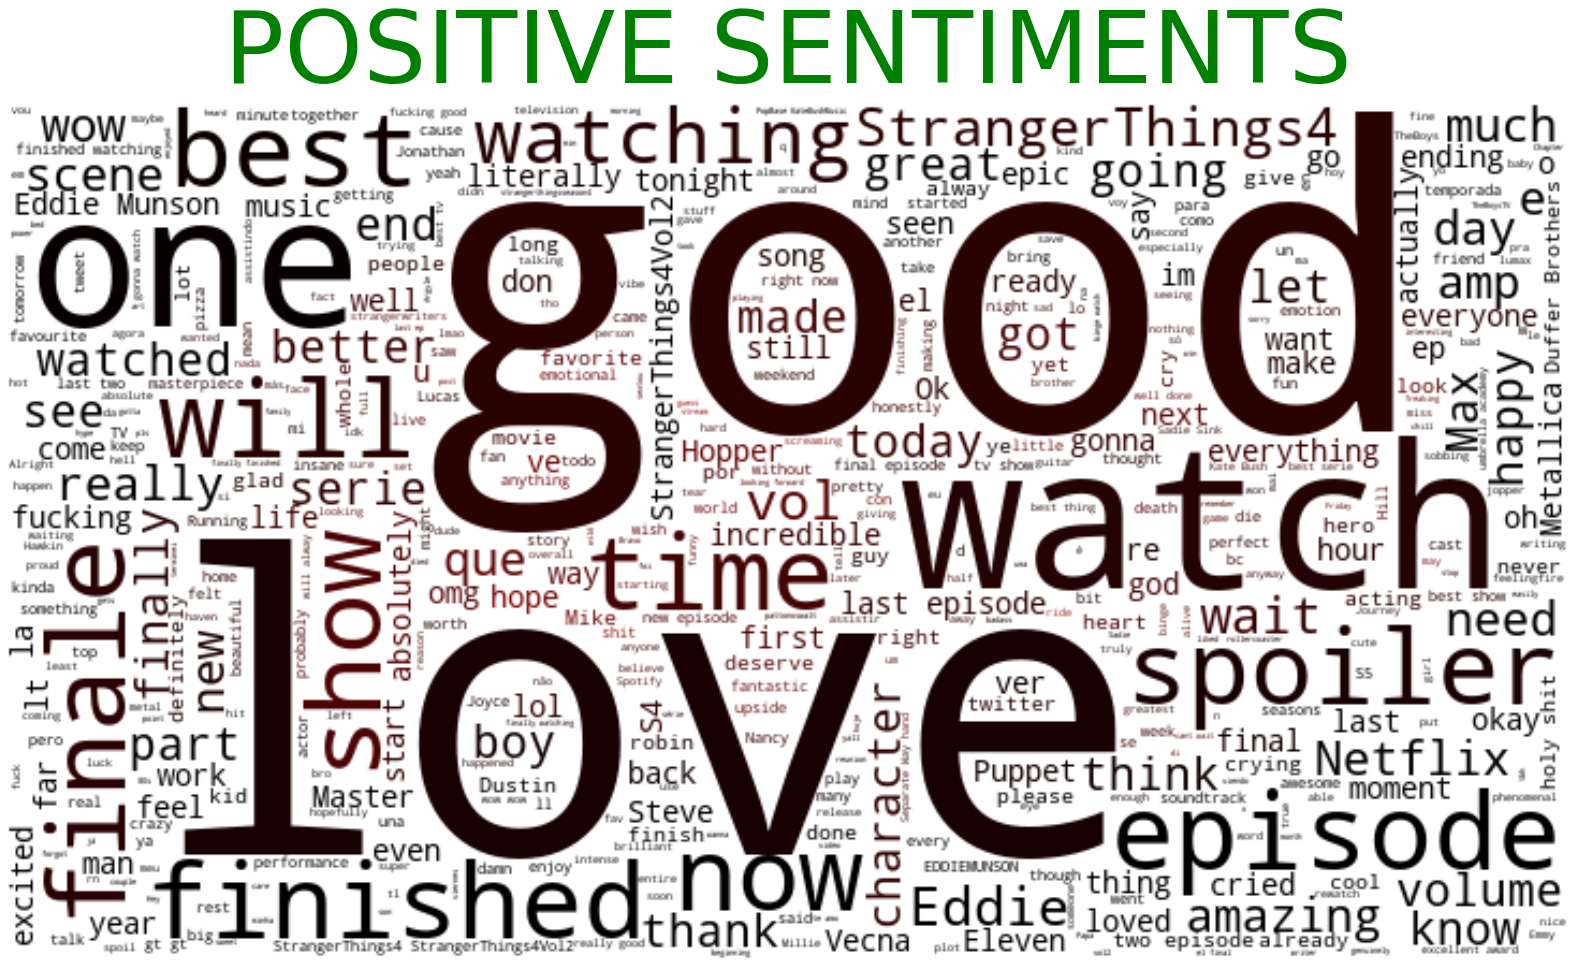

In [41]:
text = " ".join(tweet for tweet in pos_df["Tweet"])
# Generate a word cloud image
mask = np.array(Image.open("images/Stranger_Things_logo.png"))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=500, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(28,18))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("images/PositiveWordCloud.png", format="png")
plt.title("POSITIVE SENTIMENTS", fontsize=100, color= 'GREEN')
plt.show()

### Negative Sentiment Word Cloud

In [42]:
neg_df = compare_df[compare_df["Sentiment"] == 'Negative'].reset_index(drop= True)
# neg_df

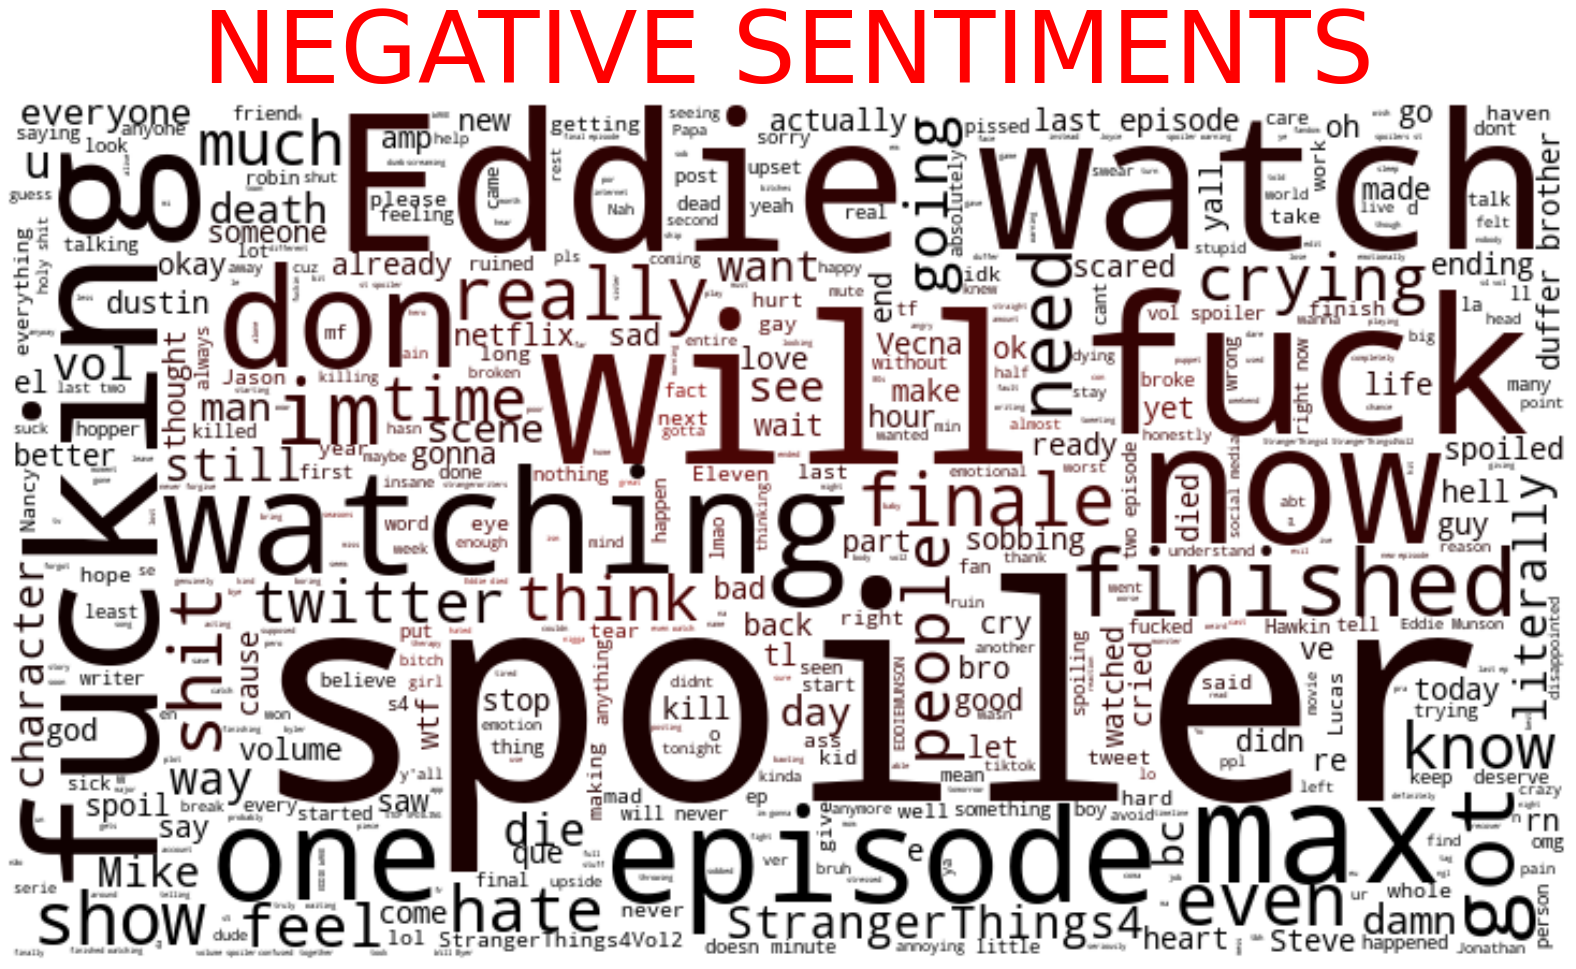

In [49]:
text = " ".join(tweet for tweet in neg_df["Tweet"])
# Generate a word cloud image
mask = np.array(Image.open("images/Stranger_Things_logo.png"))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=500, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(28,18))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("images/NegativeWordCloud.png", format="png")
plt.title("NEGATIVE SENTIMENTS", fontsize=100, color= 'red')
plt.show()

![neg](https://www.themarysue.com/wp-content/uploads/2022/06/305d482333d1d0264150b018dea79b6c.gif)

## **Model Evaluation By Human**

### Printing model-predicted positive tweets

In [44]:
for id, text in enumerate(pos_df['Tweet']):
    id = id+1
    print(str(id)+'.', text)

1. STRANGER THINGS IS AMAZING!!! #StrangerThings4 #stangerthings https://t.co/5KVfaVXkUB
2. “You’ve always been there.” ❤️ #StrangerThings season 4 has really made me root for Steve/Nancy. https://t.co/Cnlbh5ONar
3. The best scene ever #StrangerThings https://t.co/3Jbu1HfJty
4. STRANGER THINGS 1, 2 and 4 are Miles better than season 3. if season 3 didn’t exist that show would be damn near perfect
5. che mini 😭🤏🏻
#JoyceByers #StrangerThings https://t.co/IMxvttVI1l
6. Aguardando 1° de julho ansiosamente pra Netflix me meter só DOIS episódios de Stranger Things 🤡
7. These Last 2 Episodes of Stranger Things are about to hit !
8. @papanftt @Stranger_Things @jokerspite I loved it! Is this an nft from Stranger things?
9. @robsimonsen @LCOrchestra @HughBrunt @ShawnLevyDirect @21LapsEnt @Stranger_Things @AIRstudios @nickwollage @DufferBros Really excited for this Rob! watching this late tonight with a backyard projector setup 💪🏼🔥
10. Erica, Dustin and Robin are the best characters in stranger t

### Printing model-predicted negative tweets

In [ ]:
for id, text in enumerate(neg_df['Tweet']):
    id = id+1
    print(str(id)+'.', text)

1. We're going away for the weekend and I just know we're going to get spoiled for stranger things before we get a check to watch 🫣
2. @thesajeallen don’t watch stranger things but he’s kinda bad
3. O que tenho ódio em assistir Stranger Things é os gritos o tempo todoooo 😒
4. bro some of us have jobs can I get a second to watch the new stranger things eps before they get ruined for me
5. Stranger Things SPOILERS!! pt.2
*
*
*
My only problem that I can think of right now is Will got sidelined so bad😭😭😭 When will he get the respect and happiness he deserves, I can’t handle this anymore😭
6. En serio me hicieron esperar la segunda parte de stranger things para DOS capítulos 🙄
7. Stranger things world: collapsing and ending

Ted: https://t.co/tLrqS03CSe
8. I thought it was Thursday all day today lol I was confused how everyone was watching stranger things already 🤦‍♀️
9. I’m not ready to see the worlds reaction to a certain death…  #StrangerThings
10. I have to follow Stranger Things fans. 

## **CONCLUSION**

- The model predicted that there are more negative tweet than positive tweets but from the human evaluation, most of the negative tweets are considered positive in a business way.
- From the negative analysis you can induce that the series made alot of people sober, hence the higher rate of negavtive sentiment.
**NOTE:** The roberta model is very good as it is trained on millions of tweets. Nonetheless, understanding human conversation most of the times requires human initiative.

## **THE END !!!**

![cc](https://i.gifer.com/7Oja.mp4)